## Iris disease prediction

<img src="iris-machinelearning.png">

### 1) Importing necessary libraries

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
%config Completer.use_jedi = False

### 2) EDA

In [137]:
data = pd.read_csv('iris.csv')

In [138]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [169]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [140]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [141]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 3) Data processing cleaning

In [142]:
lab_name = pd.unique(data['Species'])

In [143]:
col_name = data.columns

In [144]:
labels = data['Species']

In [145]:
labels=pd.get_dummies(labels)

In [146]:
labels

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [147]:
data.drop(["Id","Species"],inplace=True,axis=1)

In [148]:
col_name = np.array(data.columns)

In [149]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [150]:
scaler = MinMaxScaler()

In [151]:
data = scaler.fit_transform(data)

In [152]:
data=pd.DataFrame(data)

In [153]:
data.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [154]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1)

### 4) Classification using Decision Tree Classifier

In [155]:
clf = DecisionTreeClassifier()

In [156]:
clf = clf.fit(X_train,y_train)

In [157]:
y_pred = clf.predict(X_test)

In [158]:
clf.score(X_test,y_test)

0.9555555555555556

### 5) Model Evaluation

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45



In [175]:
y_test=np.array(y_test)

<AxesSubplot:>

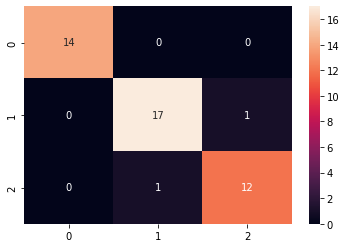

In [178]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)),annot=True)

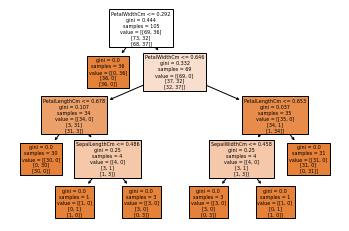

In [167]:
_ = tree.plot_tree(clf, 
                   feature_names=col_name,  
                   class_names=lab_name,
                   filled=True)
